# Load libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# All features


In [ ]:
df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam']],
                 pd.read_csv('drive/My Drive/ppnnw5.csv').iloc[:,10:],
                 pd.read_csv('drive/My Drive/ppnnw6.csv').iloc[:,10:]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1
df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die']],
                 pd.read_csv('drive/My Drive/h1w5.csv').iloc[:, 5:], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv').iloc[:,5:],
                 pd.read_csv('drive/My Drive/h1w6p2.csv').iloc[:,5:]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

Model performance with all features

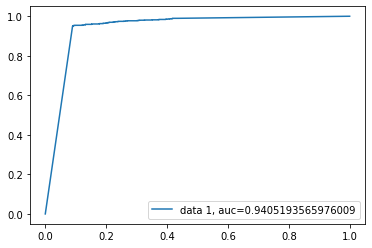

correct/TP: 1000 ** FP: 390 **  TN: 3460 ** FN: 48 ** cv_bin mean: 0.808640 ** cv_bin std: 0.019493 ** cv_mac mean: 0.873013 ** cv_mac std: 0.013938 ** f1bin: 0.820345 ** f1mac: 0.880409


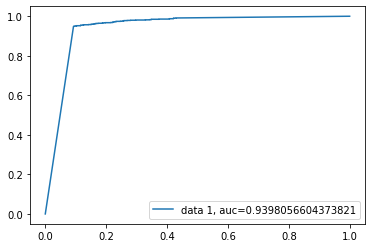

correct/TP: 994 ** FP: 412 **  TN: 3442 ** FN: 50 ** cv_bin mean: 0.813773 ** cv_bin std: 0.024513 ** cv_mac mean: 0.876803 ** cv_mac std: 0.017106 ** f1bin: 0.811429 ** f1mac: 0.874269


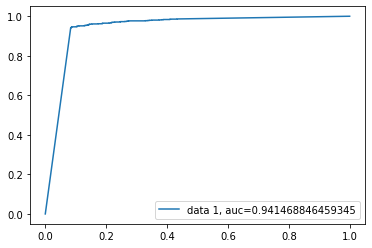

correct/TP: 973 ** FP: 377 **  TN: 3493 ** FN: 55 ** cv_bin mean: 0.814590 ** cv_bin std: 0.013953 ** cv_mac mean: 0.877261 ** cv_mac std: 0.009596 ** f1bin: 0.818335 ** f1mac: 0.880049


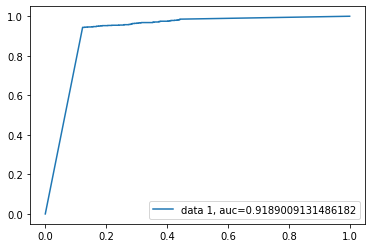

correct/TP: 975 ** FP: 535 **  TN: 3331 ** FN: 57 ** cv_bin mean: 0.772653 ** cv_bin std: 0.012622 ** cv_mac mean: 0.846689 ** cv_mac std: 0.009204 ** f1bin: 0.767113 ** f1mac: 0.842751


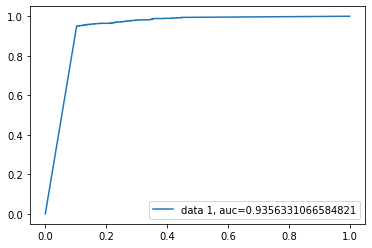

correct/TP: 987 ** FP: 451 **  TN: 3411 ** FN: 49 ** cv_bin mean: 0.796534 ** cv_bin std: 0.010698 ** cv_mac mean: 0.864374 ** cv_mac std: 0.007482 ** f1bin: 0.797898 ** f1mac: 0.864805


In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  
nballf = pd.DataFrame(temp, columns = ['TP', 'FP', 'TN', 'FN', 'cv_bin mean', 'cv_bin std', 'cv_mac mean', 'cv_man std', 'f1bin', 'f1mac'])

LOFO CV

In [ ]:
temp = []

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
nblofocv_allf = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

Fam: narnaviridae ** total: 72 ** correct/TP: 72 ** FP: 462 **  TN: 4181 ** FN: 0 ** f1bin: 0.237624 ** f1mac: 0.592633
Fam: deltaflexiviridae ** total: 4 ** correct/TP: 2 ** FP: 553 **  TN: 4090 ** FN: 2 ** f1bin: 0.007156 ** f1mac: 0.471809
Fam: nyamiviridae ** total: 6 ** correct/TP: 2 ** FP: 547 **  TN: 4096 ** FN: 4 ** f1bin: 0.007207 ** f1mac: 0.472093
Fam: mononiviridae ** total: 2 ** correct/TP: 2 ** FP: 535 **  TN: 4108 ** FN: 0 ** f1bin: 0.007421 ** f1mac: 0.473143
Fam: alphatetraviridae ** total: 8 ** correct/TP: 8 ** FP: 553 **  TN: 4090 ** FN: 0 ** f1bin: 0.028120 ** f1mac: 0.482398
Fam: peribunyaviridae ** total: 4 ** correct/TP: 4 ** FP: 535 **  TN: 4108 ** FN: 0 ** f1bin: 0.014733 ** f1mac: 0.476799
Fam: aspiviridae ** total: 4 ** correct/TP: 3 ** FP: 534 **  TN: 4109 ** FN: 1 ** f1bin: 0.011091 ** f1mac: 0.474984
Fam: endornaviridae ** total: 58 ** correct/TP: 58 ** FP: 507 **  TN: 4136 ** FN: 0 ** f1bin: 0.186196 ** f1mac: 0.564222
Fam: kitaviridae ** total: 2 ** corr

In [ ]:
nblofocv_allf

,Fam,Total,Correct/TP,FP,TN,FN,f1bin,f1mac
0,narnaviridae,72,72,462,4181,0,0.237624,0.592633
1,deltaflexiviridae,4,2,553,4090,2,0.007156,0.471809
2,nyamiviridae,6,2,547,4096,4,0.007207,0.472093
3,mononiviridae,2,2,535,4108,0,0.007421,0.473143
4,alphatetraviridae,8,8,553,4090,0,0.028120,0.482398
5,peribunyaviridae,4,4,535,4108,0,0.014733,0.476799
6,aspiviridae,4,3,534,4109,1,0.011091,0.474984
7,endornaviridae,58,58,507,4136,0,0.186196,0.564222
8,kitaviridae,2,2,543,4100,0,0.007313,0.472603
9,astroviridae,104,100,542,4101,4,0.268097,0.602841


## Model performance with 194 features

In [ ]:
l =    ['CAATCG', 'GGTA', 'GTTGA', 'CATACG', 'TGAT', 'GTCGAA', 'CCAATT', 'TGTCGA', 'GTTGAC', 
        'CGGTTA', 'CGATA', 'TAGCGT', 'AAAAAA', 'GGTTGA', 'AAAAA', 'CAAT', 'CGTCAA', 'CGGTAA', 
        'CGTTGA', 'CAAC', 'ACCAAT', 'TTGACG', 'TCAATC', 'GTTG', 'CAATTG', 'CGCAAT', 'GGTT', 
        'TTGTCG', 'TCAA', 'CCAAT', 'ATACGC', 'CGATAG', 'TTGA', 'CATCAA', 'GTTGAT', 'ATACGG', 
        'CGATC', 'GTTGGT', 'GATC', 'CCGATA', 'GTCAAT', 'CGATAA', 'CGCGTT', 'ATCGTA', 'TCGGTT', 
        'ATCAAC', 'ATTGG', 'TCGA', 'GCAATC', 'CAATCT', 'GCGTAC', 'TTCGAC', 'GGTTG', 'TCCAAT', 
        'CGTAGT', 'TTGCG', 'CGGTT', 'CGATTA', 'ACGGTT', 'ATCAAT', 'TTGCGC', 'CAATC', 'CGAT', 
        'GCGTTA', 'CCGTTA', 'TTGAC', 'CGTCGA', 'ATAGCG', 'GTTGAG', 'TATCCG', 'GGTAGT', 'CGTTGC', 
        'TCGGTA', 'TGGTT', 'AGGTTG', 'AGGAA', 'TCGAGT', 'TCAAT', 'ATAGGG', 'GTACGC', 'ACGCAA', 
        'GGTACG', 'TCCTG', 'CAGAG', 'TTGATG', 'GTCGAC', 'CGGTTG', 'ACATCG', 'CAGC', 'TTTTTT', 
        'GGTATG', 'TAGGGT', 'GGTTC', 'TGGTTC', 'CGCGTA', 'AACC', 'CTCGAT', 'AACGGT', 'ATCAA', 
        'TCCAAC', 'AAAATG', 'AAATG', 'GTTGT', 'GTCATA', 'TCAATT', 'ACAATC', 'AATAAA', 'AATTGG', 
        'ATCATA', 'GGCGTA', 'AAATAA', 'TCAAC', 'CTAACG', 'ACGATA', 'TCAACC', 'ACCGGT', 'CAGA', 
        'GCATAC', 'CTGTA', 'CGGTA', 'GTTGC', 'CTGT', 'ATTGGT', 'GGTCAA', 'CGTA', 'GTCAA', 'TCGCAA', 
        'AGCTG', 'ATGGTA', 'CGCAA', 'GTCAAA', 'GATTGG', 'CTGGA', 'TTCGCA', 'ATCCAA', 'AACCGA', 
        'CCGCAA', 'GTCGA', 'TAACAC', 'TTTTTA', 'ATAACG', 'TATGGT', 'TTGGCG', 'TGGT', 'TCCAT', 
        'CAATT', 'GCGTAA', 'TCGT', 'CCGTAA', 'GGGTTA', 'CAATTA', 'AGCCT', 'TAGCGA', 'TACCAC', 
        'CGCAAA', 'ATATCG', 'CTGCA', 'CGTACC', 'ATCGGT', 'TCGATA', 'TCGTTG', 'TTGGT', 'CGACCA', 
        'GAAGA', 'GT', 'CTGAG', 'ATGCGA', 'CAG', 'GGTAC', 'GGTTGT', 'CCATAC', 'GTTGCG', 'GATAGG', 
        'GAT', 'CAA', 'CATACC', 'AACCGT', 'TTGCGA', 'CGTAT', 'CGTAAT', 'CGATGT', 'TTCCT', 'AC', 
        'CGATCG', 'CGCTAA', 'CACAAC', 'TACC', 'TTGAG', 'CCAATC', 'TATGCG', 'TATCG', 'AGCAG', 'GGTAG', 
        'TCGTAG', 'AACCCG', 'AGAG', 'GAATCA', 'GAAGTT', 'GAAGAT', 'TCTTTA', 'CGAAGA', 'TCGAT', 'CAGT', 
        'CTTGA', 'TACG', 'CGTATG', 'CAAACA', 'TTCG', 'AGGGTT', 'TCGACC', 'CGTT', 'CTGTGA', 'TCAGT', 
        'CAGCT', 'GTGTCT', 'TGTAAA', 'ATGCCT', 'TAAACC', 'ATACCG', 'AACCG', 'CAACAA', 'CATTGG', 
        'GTACTC', 'TGTGAA', 'ATACCC', 'AACACC', 'TGCAGT', 'ATGTAA', 'AGGA', 'AAGCAC', 'GTAGGT', 
        'GTAGCT', 'CGTAGA', 'ACCCAA', 'CCAATA', 'TATTTT', 'CTTG', 'TTTTT', 'GCAATG', 'GTCGTC', 
        'GTCTAA', 'ATGCTG', 'CGTATC', 'TAGTTA', 'CAATCC', 'TTGGTC', 'TCGCA', 'GTCCAA', 'TAGGTC', 
        'CGAC', 'TGATC', 'CATAAC', 'TGATTA', 'CAATAG', 'TCTCGA', 'CTACAG', 'CTTTGG', 'TACGTC', 
        'CTCAGT', 'TTGG', 'TATTTG', 'AAACTG', 'TTCGCC', 'TGACAC', 'ACTCGT', 'CACAAA', 'TGACGA', 
        'CTTGAT', 'TCGACT', 'TGATCG', 'TAACG', 'ATATTT', 'TAGAGG', 'CCGATC', 'TCAACG', 'GTCGAT', 
        'GCGATA', 'ATGCCG', 'ACAAC', 'ACACCG', 'TTACCG', 'CGTAC', 'GTATTT', 'TTGCGT', 'CTCAG', 
        'CTTGCG', 'TTTCGA', 'TCGTA', 'TCCTGA', 'TACGCC', 'GAAG', 'GCTATC', 'CTAGTG', 'CCCTAT', 
        'ACCAGA', 'GTACTG', 'CATTTA', 'GTTAGA', 'ATAATC', 'AGGCAT', 'GATGTT', 'TAGATT', 'CAACGC', 
        'CGATTG', 'ACATTT', 'AAATGT', 'CCGAT', 'GTTATA', 'TGTTG', 'TTCAAT', 'GTCGTT', 'ACCGAT', 
        'CGATAC', 'TCGATG', 'CCACAC', 'CCAT', 'GGGTGT', 'CTATC', 'GTTGTG', 'CTTTCG', 'ATAGAT', 
        'TATGGC', 'AGCTGG', 'CTCT', 'CACAGA', 'TGGTTG', 'CTAG', 'ACGGGT', 'CATTTT', 'TTTTAG', 
        'CATAAT', 'AACCCA', 'CATAG', 'ACGGGA', 'GGTGTT', 'CCGTCC', 'AAGACC', 'ATTGCG', 'CAGTTT', 
        'TGAAGA', 'ATCG', 'AATTTG', 'TCAAAA', 'CCAAC', 'ATCA', 'TGCAG', 'CAAATT', 'ACGTTA', 'CGACTA', 
        'ACCCCT', 'CCCACT', 'CCGTAT', 'CAACGG', 'TCCATC', 'ACTAGG', 'AAGCAG', 'TTTGTA', 'GGGTCA', 
        'CGGTGT', 'GCAGTT', 'ACAATT', 'ACAACC', 'ACGTTG', 'AAATAC', 'TTCAGT', 'AGTTGA', 'GACATA', 
        'CTGACT', 'CTGTTT', 'CAAGGG', 'ATTTTA', 'CAAAC', 'TAGG', 'CTGAA', 'GCGATC', 'CAACCA', 
        'ATTCGC', 'CAATTC', 'CGTTAG', 'CACTAG', 'AGCAGT', 'CTTCTT', 'CAACTG', 'GGTGAG', 'TTCAG', 
        'AAATA', 'CGTTGT', 'TATCGC', 'AGCCA', 'GGTGAT', 'GGATAA', 'GCTGTA', 'GAAGTA', 'TTGAT', 
        'ACCGAC', 'TAGTCG', 'CTGTG', 'ATCTA', 'ACACCA', 'ATGGAT', 'CCTC', 'TGAAG', 'CGCACT', 'TAACCC', 
        'ACGTCA', 'TGATAG', 'TCGAA', 'ATACCA', 'AGGGTA', 'GATCGT', 'ATCCAG', 'TCAGC', 'GCAGAT', 
        'TACCTG', 'ACCCGT', 'CCATA', 'AATTGA', 'AGGTAC', 'GGT', 'CTGCCT', 'ACTAGT', 'TTGTTC', 'TTACTT', 
        'TTTTA', 'CAGAC', 'GCGTAG', 'GAGCAT', 'ATC', 'ATGG', 'AAGCCT', 'CACTCG', 'TCAGTG', 'CTGGAG', 
        'CTTCCT', 'CGTCAT', 'CCGTTG', 'TAGTTG', 'CGTCCA', 'GCCCAG', 'ATGGT', 'TACAC', 'GATAGT', 
        'ACAACA', 'CTATAG', 'AATGGT', 'AGAAA', 'ATGACG', 'GATAAC', 'CAGCTT', 'CATGAT', 'TTCGTT', 
        'GTGTAC', 'TTGAAC', 'CACAAG', 'AATTG', 'GTCA', 'TGCCT', 'CTCGAC', 'CTATCT', 'TGACGG', 
        'CCATAT', 'ACCATT', 'AAAGAG', 'ATTAGA', 'GCGTAT', 'CGTTG', 'TACGT', 'ACGAT', 'TCCATG', 
        'CCTG', 'GTCAAC', 'TTGTGA', 'ACTAG', 'GCGACA', 'TGAAGC', 'TACAAC', 'ACGGTA', 'TAGCGG', 
        'ATTGAT', 'ATCACG', 'ATTCGG', 'TATTTC', 'TAAAAT', 'GTATCG', 'CAACCG', 'CCCCAA', 'CGTAAC',
        'CTAGGG', 'ATCAAA', 'ATTGGA', 'TCGTC', 'GCAACT', 'CACTA', 'CCATAG', 'CACAA', 'ATAGGT', 
        'ACGTAG', 'CATGCG', 'ATGATC', 'CCGTCA', 'CGATT', 'TTTGAC', 'CGTTA', 'TCTGTA', 'TAGATC', 
        'CATAGC', 'TCCAGA', 'ACACTC', 'CGATCA', 'GGATGT', 'TTACGC', 'AACTGC', 'ATCCAT', 'CCACTC', 
        'GTCCAT', 'ACCACT', 'GCGCGG', 'GTCAAG', 'AAGTGT', 'ATGATA', 'AGCT', 'CTAGAG', 'GCAGA', 
        'GTCATG', 'CTGTAG', 'TCATGC', 'CAGAA', 'ACACGG', 'CGGTAT', 'TTTTAA', 'TCAAAG', 'TTACAC', 
        'TCCGCT', 'CCCCCC', 'GCACAA', 'TTCTGT', 'TATGTA', 'GGTAAC', 'TAGCG', 'ATACC', 'GGTATC', 
        'ACAA', 'TCTGT', 'ACTA', 'TCCGTA', 'CTATCA', 'CGCATA', 'TCTCAG', 'CATGGA', 'ATCT', 'TGCGAC', 
        'ACAC', 'GACCAT', 'CAGCAT', 'ACG', 'CTAGTA', 'TTAGCG', 'TAACGA', 'ACTGAG', 'GAAGT', 'CTTGAC', 
        'CGTAGG', 'TCGCTC', 'CTGAAG', 'TTGACA', 'CGGCAA', 'CTCAAG', 'ACGTA', 'CAAGTG', 'TCAGA', 'GAGCAA', 
        'CGAAAG', 'ACTTTT', 'TACCG', 'GTTGTT', 'GCCATA', 'GCGTA', 'ACGA', 'TCGACG', 'ATACG', 'GTAC', 
        'TTGCCG', 'GGCGGG', 'CTAGT', 'GAACCA', 'TTTCTG', 'TCTTGA', 'TAAAA', 'TTGAGG', 'TAACGC', 'TATAGG',
        'GTCGTA', 'GCATTT', 'TACTG', 'TATCGA', 'CGTAA', 'AGGCTT', 'CGTTAT', 'TATC', 'TTGATT', 'TGCAGA', 
        'TAGGCG', 'GCTTGA', 'ATCTAT', 'GGTTAG', 'TACAAT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]
b1 = [f for f in b if f[0] == 'A' or f[0] == 'T']
b2 = [f for f in b if f[0] == 'G' or f[0] == 'C']

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1

df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die'] + c], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv')[b1],
                 pd.read_csv('drive/My Drive/h1w6p2.csv')[b2]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

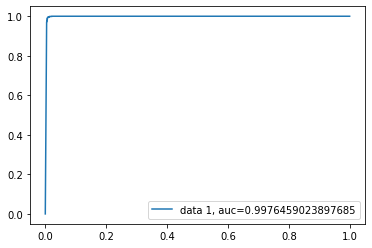

correct/TP: 1007 ** FP: 25 **  TN: 3852 ** FN: 14 ** cv_bin mean: 0.981769 ** cv_bin std: 0.008673 ** cv_mac mean: 0.988421 ** cv_mac std: 0.005519 ** f1bin: 0.981003 ** f1mac: 0.987983


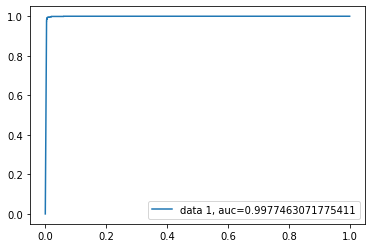

correct/TP: 997 ** FP: 23 **  TN: 3867 ** FN: 11 ** cv_bin mean: 0.982157 ** cv_bin std: 0.005434 ** cv_mac mean: 0.988655 ** cv_mac std: 0.003468 ** f1bin: 0.983235 ** f1mac: 0.989429


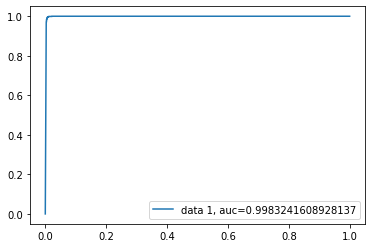

correct/TP: 995 ** FP: 25 **  TN: 3867 ** FN: 11 ** cv_bin mean: 0.980571 ** cv_bin std: 0.004750 ** cv_mac mean: 0.987645 ** cv_mac std: 0.003033 ** f1bin: 0.982231 ** f1mac: 0.988799


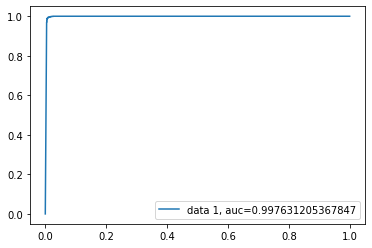

correct/TP: 1004 ** FP: 28 **  TN: 3855 ** FN: 11 ** cv_bin mean: 0.980984 ** cv_bin std: 0.004479 ** cv_mac mean: 0.987919 ** cv_mac std: 0.002857 ** f1bin: 0.980948 ** f1mac: 0.987957


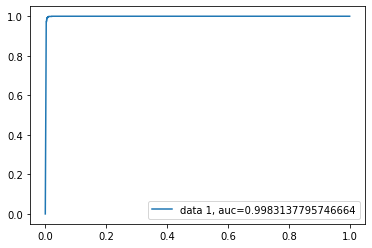

correct/TP: 1017 ** FP: 25 **  TN: 3848 ** FN: 8 ** cv_bin mean: 0.980914 ** cv_bin std: 0.006527 ** cv_mac mean: 0.987887 ** cv_mac std: 0.004146 ** f1bin: 0.984035 ** f1mac: 0.989883


In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))

LOFO CV

In [ ]:
temp = []

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1['Gen'] = 1

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
nblofocv_194f = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

Fam: narnaviridae ** total: 72 ** correct/TP: 71 ** FP: 24 **  TN: 4619 ** FN: 1 ** f1bin: 0.850299 ** f1mac: 0.923800
Fam: deltaflexiviridae ** total: 4 ** correct/TP: 4 ** FP: 25 **  TN: 4618 ** FN: 0 ** f1bin: 0.242424 ** f1mac: 0.619862
Fam: nyamiviridae ** total: 6 ** correct/TP: 3 ** FP: 25 **  TN: 4618 ** FN: 3 ** f1bin: 0.176471 ** f1mac: 0.586724
Fam: mononiviridae ** total: 2 ** correct/TP: 2 ** FP: 25 **  TN: 4618 ** FN: 0 ** f1bin: 0.137931 ** f1mac: 0.567616
Fam: alphatetraviridae ** total: 8 ** correct/TP: 8 ** FP: 25 **  TN: 4618 ** FN: 0 ** f1bin: 0.390244 ** f1mac: 0.693772
Fam: peribunyaviridae ** total: 4 ** correct/TP: 4 ** FP: 25 **  TN: 4618 ** FN: 0 ** f1bin: 0.242424 ** f1mac: 0.619862
Fam: aspiviridae ** total: 4 ** correct/TP: 3 ** FP: 25 **  TN: 4618 ** FN: 1 ** f1bin: 0.187500 ** f1mac: 0.592346
Fam: endornaviridae ** total: 60 ** correct/TP: 60 ** FP: 25 **  TN: 4618 ** FN: 0 ** f1bin: 0.827586 ** f1mac: 0.912443
Fam: kitaviridae ** total: 2 ** correct/TP: 

In [ ]:
nblofocv_194f

,Fam,Total,Correct/TP,FP,TN,FN,f1bin,f1mac
0,narnaviridae,72,71,24,4619,1,0.850299,0.923800
1,deltaflexiviridae,4,4,25,4618,0,0.242424,0.619862
2,nyamiviridae,6,3,25,4618,3,0.176471,0.586724
3,mononiviridae,2,2,25,4618,0,0.137931,0.567616
4,alphatetraviridae,8,8,25,4618,0,0.390244,0.693772
5,peribunyaviridae,4,4,25,4618,0,0.242424,0.619862
6,aspiviridae,4,3,25,4618,1,0.187500,0.592346
7,endornaviridae,60,60,25,4618,0,0.827586,0.912443
8,kitaviridae,2,2,25,4618,0,0.137931,0.567616
9,astroviridae,132,132,24,4619,0,0.916667,0.957038


# 68 Features

In [ ]:
l =    ['TCAATC', 'CCAATT', 'GTTGAC', 'TGAT', 'GGTT', 'GGTTGA', 'GTTGA',
       'TAGCGT', 'CGGTTA', 'TTGACG', 'CGATA', 'CGTCAA', 'CAATCG', 'CGTTGA',
       'GTCGAA', 'GTTG', 'CGGTAA', 'CATACG', 'AAAAAA', 'ACCAAT', 'TCAA',
       'TTGTCG', 'CGATAG', 'AAAAA', 'CAAC', 'ATACGC', 'CAATTG', 'CCAAT',
       'CGCAAT', 'GGTA', 'CAAT', 'TGTCGA', 'CGAT', 'CAATCT', 'GCGTAC', 'GGTTG',
       'TTGA', 'GTTGGT', 'TCCAAT', 'TTGCG', 'ACGGTT', 'CGATTA', 'ATCAAT',
       'GCAATC', 'ATCAAC', 'GTTGAT', 'GTCAAT', 'CGTCGA', 'ATTGG', 'CGTAGT',
       'ATAGCG', 'CCGATA', 'CAATC', 'CATCAA', 'TTCGAC', 'TTGAC', 'TTGCGC',
       'GCGTTA', 'CCGTTA', 'ATACGG', 'CGCGTT', 'CGATC', 'CGATAA', 'ATCGTA',
       'TCGA', 'TCGGTT', 'GATC', 'CGGTT']

c = [f for f in l if len(f) < 6]
b = [f for f in l if len(f) == 6]
b1 = [f for f in b if f[0] == 'A' or f[0] == 'T']
b2 = [f for f in b if f[0] == 'G' or f[0] == 'C']

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)

df1 = df1.loc[df1['die'] == 'no']
df1['Gen'] = 1

df2 = pd.concat([pd.read_csv('drive/My Drive/h1w5.csv')[['die'] + c], 
                 pd.read_csv('drive/My Drive/h1w6p1.csv')[b1],
                 pd.read_csv('drive/My Drive/h1w6p2.csv')[b2]], axis = 1)
df2 = df2.loc[df2['die'] == 'no']
df2['Gen'] = 0

data = pd.concat([df1, df2], axis = 0).reset_index(drop = True)

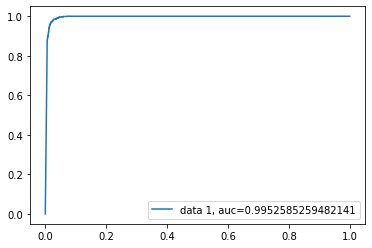

correct/TP: 1021 ** FP: 93 **  TN: 3760 ** FN: 24 ** cv_bin mean: 0.944594 ** cv_bin std: 0.011309 ** cv_mac mean: 0.964627 ** cv_mac std: 0.007311 ** f1bin: 0.945808 ** f1mac: 0.965244


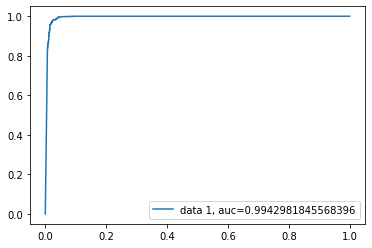

correct/TP: 970 ** FP: 95 **  TN: 3812 ** FN: 21 ** cv_bin mean: 0.942488 ** cv_bin std: 0.012554 ** cv_mac mean: 0.963099 ** cv_mac std: 0.008100 ** f1bin: 0.943580 ** f1mac: 0.964296


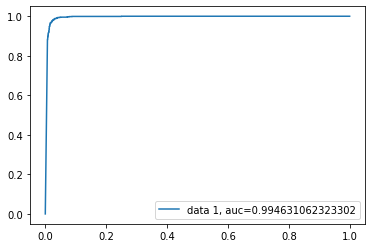

correct/TP: 1066 ** FP: 101 **  TN: 3711 ** FN: 20 ** cv_bin mean: 0.942172 ** cv_bin std: 0.010314 ** cv_mac mean: 0.963231 ** cv_mac std: 0.006569 ** f1bin: 0.946294 ** f1mac: 0.965126


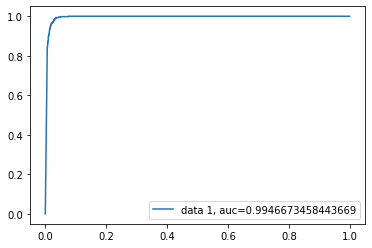

correct/TP: 984 ** FP: 111 **  TN: 3784 ** FN: 19 ** cv_bin mean: 0.944684 ** cv_bin std: 0.008308 ** cv_mac mean: 0.964585 ** cv_mac std: 0.005356 ** f1bin: 0.938036 ** f1mac: 0.960574


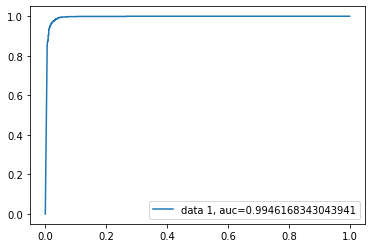

correct/TP: 1008 ** FP: 93 **  TN: 3770 ** FN: 27 ** cv_bin mean: 0.943263 ** cv_bin std: 0.007921 ** cv_mac mean: 0.963735 ** cv_mac std: 0.005136 ** f1bin: 0.943820 ** f1mac: 0.964077


In [ ]:
temp = []
for i in range(5):
  #Splitting features and labels
  X = data.iloc[:, 3:].values.astype(float)
  y = data.iloc[:, 0].values.astype(float)

  # Splitting the dataset into the Training set and Test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

  # Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  ### Training the decision tree model on the Training set
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)

  # Making the Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)

  #evaluation
  cv_bin = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1')
  cv_mac = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_macro')
  f1bin = f1_score(y_test, y_pred, average='binary')
  f1mac = f1_score(y_test, y_pred, average='macro')

  #AUC
  acc = metrics.accuracy_score(y_test, y_pred)
  y_pred_proba = classifier.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  temp.append((cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))
  print('correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** cv_bin mean: %f ** cv_bin std: %f ** cv_mac mean: %f ** cv_mac std: %f ** f1bin: %f ** f1mac: %f' 
        % (cm[1,1], cm[0,1], cm[0,0], cm[1,0], cv_bin.mean(), cv_bin.std(), cv_mac.mean(), cv_mac.std(), f1bin, f1mac))

In [ ]:
temp = []

df1 = pd.concat([pd.read_csv('drive/My Drive/ppnnw5.csv')[['Gen', 'die', 'Fam'] + c], 
                 pd.read_csv('drive/My Drive/ppnnw6.csv')[b]], axis = 1)
df1['Gen'] = 1

df2test = df2.sample(frac = 0.3)
df2train = df2[~df2.index.isin(df2test.index)]

for fam in set(df1['Fam'].to_list()):
    df1test = df1.loc[df1['Fam'] == fam]
    df1train = df1.loc[~(df1['Fam'] == fam)]
    df1train = df1train.loc[df1train['die'] == 'no']
    
    X_train = pd.concat([df1train.iloc[:,3:], df2train.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_train = pd.concat([df1train.iloc[:,0], df2train.iloc[:,-1]], axis = 0).reset_index(drop = True)

    X_test = pd.concat([df1test.iloc[:,3:], df2test.iloc[:,1:-1]], axis = 0).reset_index(drop = True)
    y_test = pd.concat([df1test.iloc[:,0], df2test.iloc[:,-1]], axis = 0).reset_index(drop = True)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #evaluation
    f1bin = f1_score(y_test, y_pred, average='binary')
    f1mac = f1_score(y_test, y_pred, average='macro')
    
    temp.append((fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))

    print('Fam: %s ** total: %d ** correct/TP: %d ** FP: %d **  TN: %d ** FN: %d ** f1bin: %f ** f1mac: %f' 
          % (fam, len(df1test), cm[1,1], cm[0,1], cm[0,0], cm[1,0], f1bin, f1mac))
  
nblofocv_68f = pd.DataFrame(temp, columns = ['Fam', 'Total', 'Correct/TP', 'FP', 'TN', 'FN', 'f1bin', 'f1mac']) 

Fam: narnaviridae ** total: 72 ** correct/TP: 71 ** FP: 141 **  TN: 4502 ** FN: 1 ** f1bin: 0.500000 ** f1mac: 0.742237
Fam: deltaflexiviridae ** total: 4 ** correct/TP: 4 ** FP: 143 **  TN: 4500 ** FN: 0 ** f1bin: 0.052980 ** f1mac: 0.518670
Fam: nyamiviridae ** total: 6 ** correct/TP: 3 ** FP: 143 **  TN: 4500 ** FN: 3 ** f1bin: 0.039474 ** f1mac: 0.511755
Fam: mononiviridae ** total: 2 ** correct/TP: 2 ** FP: 143 **  TN: 4500 ** FN: 0 ** f1bin: 0.027211 ** f1mac: 0.505785
Fam: alphatetraviridae ** total: 8 ** correct/TP: 8 ** FP: 143 **  TN: 4500 ** FN: 0 ** f1bin: 0.100629 ** f1mac: 0.542494
Fam: peribunyaviridae ** total: 4 ** correct/TP: 2 ** FP: 143 **  TN: 4500 ** FN: 2 ** f1bin: 0.026846 ** f1mac: 0.505495
Fam: aspiviridae ** total: 4 ** correct/TP: 3 ** FP: 143 **  TN: 4500 ** FN: 1 ** f1bin: 0.040000 ** f1mac: 0.512126
Fam: endornaviridae ** total: 60 ** correct/TP: 60 ** FP: 145 **  TN: 4498 ** FN: 0 ** f1bin: 0.452830 ** f1mac: 0.718484
Fam: kitaviridae ** total: 2 ** corr

In [ ]:
nblofocv_68f

,Fam,Total,Correct/TP,FP,TN,FN,f1bin,f1mac
0,narnaviridae,72,71,141,4502,1,0.500000,0.742237
1,deltaflexiviridae,4,4,143,4500,0,0.052980,0.518670
2,nyamiviridae,6,3,143,4500,3,0.039474,0.511755
3,mononiviridae,2,2,143,4500,0,0.027211,0.505785
4,alphatetraviridae,8,8,143,4500,0,0.100629,0.542494
5,peribunyaviridae,4,2,143,4500,2,0.026846,0.505495
6,aspiviridae,4,3,143,4500,1,0.040000,0.512126
7,endornaviridae,60,60,145,4498,0,0.452830,0.718484
8,kitaviridae,2,2,143,4500,0,0.027211,0.505785
9,astroviridae,132,132,143,4500,0,0.648649,0.816504
